In [1]:
# 資料預處理
import numpy as np
np.random.seed(10)

from tensorflow.keras.datasets import mnist
(train, train_label), (test, test_label) = mnist.load_data()

train = train.reshape(train.shape[0], 28, 28, 1).astype('float32') / 255.0
test = test.reshape(test.shape[0], 28, 28, 1).astype('float32') / 255.0

import tensorflow as tf
train_label_one_hot = tf.one_hot(train_label, np.max(train_label) + 1)
test_label_one_hot = tf.one_hot(test_label, np.max(test_label) + 1)

In [2]:
# 建立模型
from tensorflow.keras import Sequential
model = Sequential()

from tensorflow.keras import layers
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [3]:
# 訓練模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=train, y=train_label_one_hot, batch_size=300, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
160/160 - 21s - loss: 0.5228 - accuracy: 0.8381 - val_loss: 0.1104 - val_accuracy: 0.9651
Epoch 2/10
160/160 - 24s - loss: 0.1404 - accuracy: 0.9589 - val_loss: 0.0640 - val_accuracy: 0.9796
Epoch 3/10
160/160 - 22s - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 4/10
160/160 - 22s - loss: 0.0802 - accuracy: 0.9757 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 5/10
160/160 - 22s - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0436 - val_accuracy: 0.9871
Epoch 6/10
160/160 - 25s - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 7/10
160/160 - 21s - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 8/10
160/160 - 21s - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 9/10
160/160 - 22s - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 10/10
160/160 - 22s - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0326 - val_accura

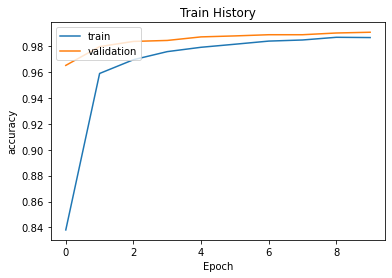

In [4]:
import matplotlib.pyplot as plt
def show_train_history(train_history, blue, orange):
	plt.plot(train_history.history[train])
	plt.plot(train_history.history[validation])
	plt.title('Train History')
	plt.ylabel(train)
	plt.xlabel('Epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')

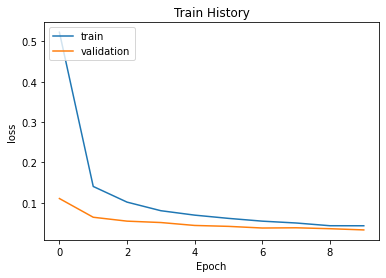

In [5]:
show_train_history(train_history, 'loss', 'val_loss')

In [6]:
# 評估模型準確率
scores = model.evaluate(test, test_label_one_hot)
scores[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9905


0.9904999732971191

In [7]:
# 進行預測
prediction = model.predict_classes(test)
prediction[:10]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

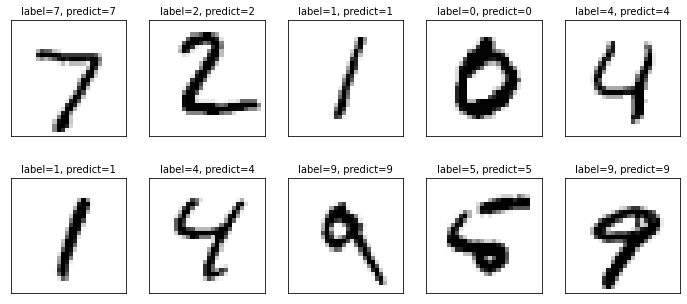

In [8]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[i])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(test, test_label, prediction, idx=0)

In [9]:
import pandas as pd
pd.crosstab(test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1130,2,0,0,1,1,1,0,0
2,2,0,1029,0,0,0,0,1,0,0
3,0,0,0,1005,0,2,0,1,2,0
4,0,0,1,0,962,0,4,2,2,11
5,1,0,0,4,0,885,1,0,0,1
6,4,2,0,1,1,1,948,0,1,0
7,1,2,5,2,0,0,0,1013,1,4
8,2,0,2,1,0,1,0,2,964,2
